In [379]:
import pandas as pd

In [380]:
file_path = "data/breast.tsv" #"data/BNG_breastTumor.tsv"
data_bc = pd.read_csv(file_path, sep="\t", header=None)

In [381]:
#data_bc = data_bc[:20000]

#data_bc.to_csv("data/BNG_breastTumor_small.tsv", sep="\t", header=None)

In [382]:
data_bc

,0,1,2,3,4,5,6,7,8,9,10
0,1365328,1,1,2,1,2,0,2,1,1,0
1,242970,5,7,7,1,5,8,3,4,1,0
2,1133041,5,3,1,2,2,0,2,1,1,0
3,183936,3,1,1,1,2,0,2,1,1,0
4,1168278,3,1,1,1,2,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,695091,5,10,10,5,4,5,4,4,1,1
695,837480,7,4,4,3,4,1,6,9,1,1
696,1057013,8,4,5,1,2,10,7,3,1,1
697,390840,8,4,7,1,3,1,3,9,2,1


In [383]:
label_index = data_bc.shape[1] - 1

print(label_index)

10


In [384]:
labels = data_bc[label_index]
data_bc = data_bc.drop([label_index], axis=1)

In [385]:
data_bc

,0,1,2,3,4,5,6,7,8,9
0,1365328,1,1,2,1,2,0,2,1,1
1,242970,5,7,7,1,5,8,3,4,1
2,1133041,5,3,1,2,2,0,2,1,1
3,183936,3,1,1,1,2,0,2,1,1
4,1168278,3,1,1,1,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...
694,695091,5,10,10,5,4,5,4,4,1
695,837480,7,4,4,3,4,1,6,9,1
696,1057013,8,4,5,1,2,10,7,3,1
697,390840,8,4,7,1,3,1,3,9,2


In [386]:
labels

0      0
1      0
2      0
3      0
4      0
      ..
694    1
695    1
696    1
697    1
698    1
Name: 10, Length: 699, dtype: int64

In [422]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_bc, labels, test_size=0.2, random_state=42)

In [423]:
X_train.shape

(559, 10)

In [424]:
X_test.shape

(140, 10)

In [425]:
y_train.shape

(559,)

In [426]:
y_test.shape

(140,)

In [429]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import backend as K
from sklearn.metrics import r2_score

batch_size = 64
n_epochs = 10
n_units = 32
rate_dropout = 0.1

#y_train = keras.utils.to_categorical(y_train, num_classes=3)
#y_test = keras.utils.to_categorical(y_test, num_classes=3)


def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

model = Sequential()
model.add(Dense(n_units, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(rate=rate_dropout))
model.add(Dense(n_units, activation='relu'))
model.add(Dropout(rate=rate_dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Train on 559 samples, validate on 140 samples
Epoch 1/10
559/559 [==============================] - 6s 10ms/step - loss: 5.5925 - acc: 0.6530 - val_loss: 5.4111 - val_acc: 0.6643
Epoch 2/10
559/559 [==============================] - 0s 104us/step - loss: 5.5934 - acc: 0.6530 - val_loss: 5.4111 - val_acc: 0.6643
Epoch 3/10
559/559 [==============================] - 0s 121us/step - loss: 5.6505 - acc: 0.6494 - val_loss: 5.4111 - val_acc: 0.6643
Epoch 4/10
559/559 [==============================] - 0s 105us/step - loss: 5.5928 - acc: 0.6530 - val_loss: 5.4111 - val_acc: 0.6643
Epoch 5/10
559/559 [==============================] - 0s 116us/step - loss: 5.6787 - acc: 0.6476 - val_loss: 5.4111 - val_acc: 0.6643
Epoch 6/10
559/559 [==============================] - 0s 158us/step - loss: 5.5637 - acc: 0.6547 - val_loss: 5.4111 - val_acc: 0.6643
Epoch 7/10
559/559 [==============================] - 0s 148us/step - loss: 5.6787 - acc: 0.6476 - val_loss: 5.4111 - val_acc: 0.6643
Epoch 8/10
559/55

In [393]:
pred_y = model.predict(X_test)

In [394]:
import matplotlib.pyplot as plt
import numpy as np


y_test_list = y_test.tolist()
y_test_pred = list()

for i in pred_y:
    y_test_pred.append(i[0])
    
r2score = r2_score(y_test_list, y_test_pred)

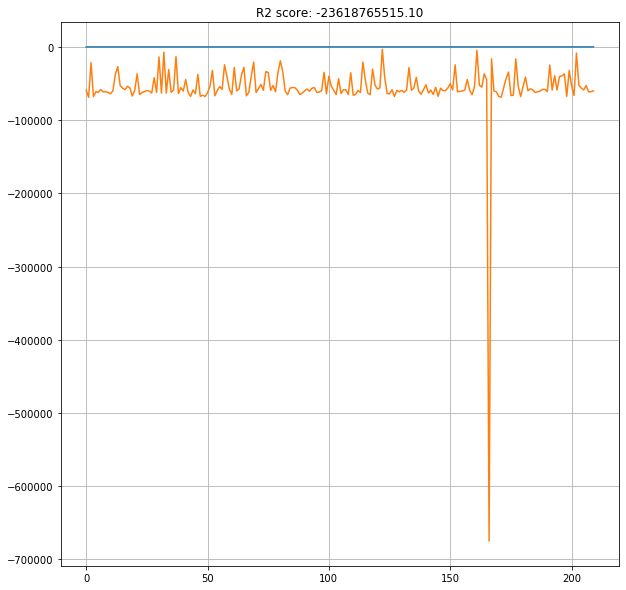

In [395]:
fig = plt.figure(figsize=(10, 10))
plt.plot(y_test_list)
plt.plot(y_test_pred)
plt.grid(True)
plt.title("R2 score: %.2f" % r2score)
plt.show()